In [39]:
    from matplotlib import pyplot as plt
    import theano
    import cv2
    import numpy as np
    import scipy as sp
    from keras.models import Sequential
    from keras.layers.core import Flatten, Dense, Dropout
    from keras.layers.convolutional import Convolution2D, MaxPooling2D
    from keras.layers.convolutional import ZeroPadding2D
    from keras.optimizers import SGD
    from sklearn.manifold import TSNE
    from sklearn import manifold
    from sklearn import cluster
    from sklearn.preprocessing import StandardScaler
    def VGG_16(weights_path=None):
        model = Sequential()
        model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
        model.add(Convolution2D(64, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(64, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2)))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(128, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(128, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2)))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(256, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(256, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(256, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2)))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2)))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(512, 3, 3, activation='relu'))
        model.add(MaxPooling2D((2,2)))
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1000, activation='softmax'))
        if weights_path:
            model.load_weights(weights_path)
        return model

In [40]:
model = VGG_16('vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

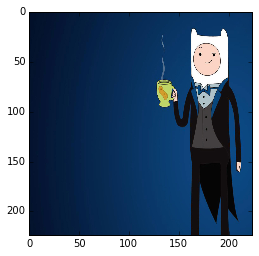

In [50]:
%matplotlib inline

im_original = cv2.resize(cv2.imread('finn3.jpg'), (224, 224))
im = im_original.transpose((2,0,1))
im = np.expand_dims(im, axis=0)
im_converted = cv2.cvtColor(im_original, cv2.COLOR_BGR2RGB)
plt.imshow(im_converted)

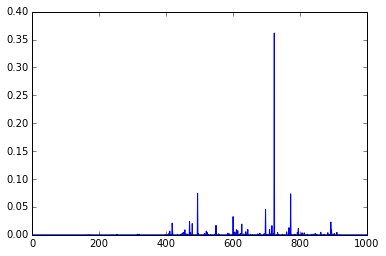

In [51]:
out = model.predict(im)
plt.plot(out.ravel())

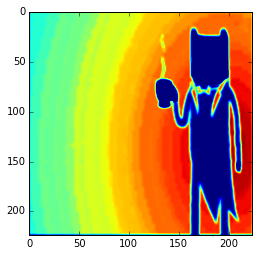

In [52]:
get_feature = theano.function([model.layers[0].input], 
                              model.layers[3].get_output(train=False), 
                              allow_input_downcast=False)
feat = get_feature(im)
plt.imshow(feat[0][2])